### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Read & Load Data

In [2]:
train=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\Movie_review\\Movie_Train.csv')
train.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,A series of escapades demonstrating the adage ...,1
1,1,2,1,A series of escapades demonstrating the adage ...,2
2,2,3,1,A series,2
3,3,4,1,A,2
4,4,5,1,series,2


In [3]:
test=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\Movie_review\\Movie_Test.csv')
test.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase
0,0,156061,8545,An intermittently pleasing but mostly routine ...
1,1,156062,8545,An intermittently pleasing but mostly routine ...
2,2,156063,8545,An
3,3,156064,8545,intermittently pleasing but mostly routine effort
4,4,156065,8545,intermittently pleasing but mostly routine


### Understand the data

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Regular Expression (re package).ipynb',
 'Text Preprocessing-1.ipynb',
 'Text Preprocessing.ipynb',
 'Untitled2.ipynb']

In [5]:
train.shape

(156060, 5)

In [6]:
train.size

780300

In [7]:
test.shape

(66292, 4)

In [8]:
test.size

265168

#### To See the "Phrase" columns entire text Set the column width

In [9]:
pd.set_option('display.max_colwidth',9999)
train.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,2,3,1,A series,2
3,3,4,1,A,2
4,4,5,1,series,2


In [10]:
test.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase
0,0,156061,8545,An intermittently pleasing but mostly routine effort .
1,1,156062,8545,An intermittently pleasing but mostly routine effort
2,2,156063,8545,An
3,3,156064,8545,intermittently pleasing but mostly routine effort
4,4,156065,8545,intermittently pleasing but mostly routine


### What are the different type of Sentiments?

In [11]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

### Rename the sentiments column values so that anyone can understand.

In [13]:
def sent(x):
    if x>=3:
        return 'positive'
    elif x==2:
        return 'neutral'
    else:
        return 'negative'
    
    
train['Sentiment_class']=train['Sentiment'].apply(sent)
train['Sentiment_class'].value_counts(normalize=True)*100

neutral     50.994489
positive    26.997950
negative    22.007561
Name: Sentiment_class, dtype: float64

- 50% are neutral, 26% are positive & 22% are nnegative Sentiments.

##### Now just see Phrases and Sentiments class

In [14]:
train1=train[['Phrase', 'Sentiment_class']]
train1.head()

,Phrase,Sentiment_class
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative
1,A series of escapades demonstrating the adage that what is good for the goose,neutral
2,A series,neutral
3,A,neutral
4,series,neutral


### Cleaning the data
* 1. Level 1 Technique:
        * Regex
        * Removal of numbers
        * Removal of symbols
        * Making text in lower case
        * Removing the commonly occurring words
        
* 2. Level 2 Technique: (We actually see the Natural Language Processing taking place as these techniques are highly language based)
        * POS Tagging
        * Stemming
        * Lemmatization
        * Stop words
        * Business Specific Words

#### Stopwords in English

In [15]:
nltk_stopwords=stopwords.words('english')
len(nltk_stopwords)

179

In [17]:
nltk_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Above are the Stopwords in English**

### Adding some more stopwords

In [18]:
my_stopwords=['i see','you know', 'none', 'also', 'would','would not','some']
final_stop_words=nltk_stopwords+my_stopwords
len(final_stop_words)

186

- Now the total stopwords are 186.

### Defining a function which replace some words

In [19]:
def decontract(text):
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

**Lets test the function**

In [20]:
tt="I won't take it personality" 
re.sub(r"won\'t", "will not", tt)

'I will not take it personality'

### Creating Lemma

In [21]:
lem=WordNetLemmatizer()

### Defining Function that removes some unwanted text & symbols

In [22]:
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)             # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()   # removing html tags
    text = decontract(text)                         # decontracting
    text = re.sub("\S*\d\S*", "", text).strip()     # removing the words with numeric digits
    text = re.sub('[^A-Za-z]+', ' ', text)          # removing non-word characters
    text = text.lower()                             # converting to lower case
    text = [word for word in text.split(" ") if not word in final_stop_words] # removing stop words
    text = [lem.lemmatize(token) for token in text] #Lemmatization
    text = " ".join(text)
    text.strip()
    return text

### Apply the Above function to preprocess our Text Data

In [23]:
train1['Phrase1']=train1['Phrase'].apply(lambda x : preprocess_text(x))

In [24]:
train1.columns

Index(['Phrase', 'Sentiment_class', 'Phrase1'], dtype='object')

In [27]:
train1.head()

,Phrase,Sentiment_class,Phrase1
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative,series escapade demonstrating adage good goose good gander occasionally amuses amount much story
1,A series of escapades demonstrating the adage that what is good for the goose,neutral,series escapade demonstrating adage good goose
2,A series,neutral,series
3,A,neutral,
4,series,neutral,series


### Display the Words which Represent Positive Sentiment

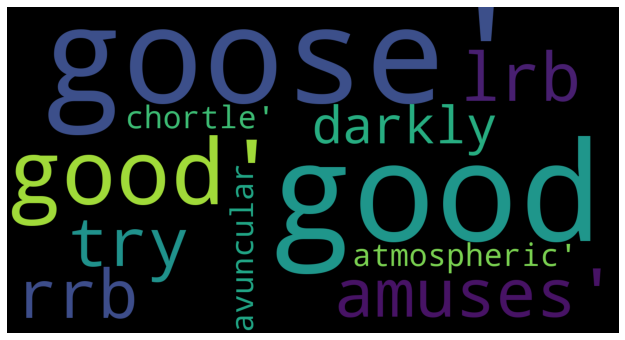

In [28]:
for_graph=train1[train1['Sentiment_class']=='positive']
review=for_graph['Phrase1'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(18,6))
plt.imshow(word_cloud)
plt.axis('off');

### Display the Words which Represent Negative Sentiment

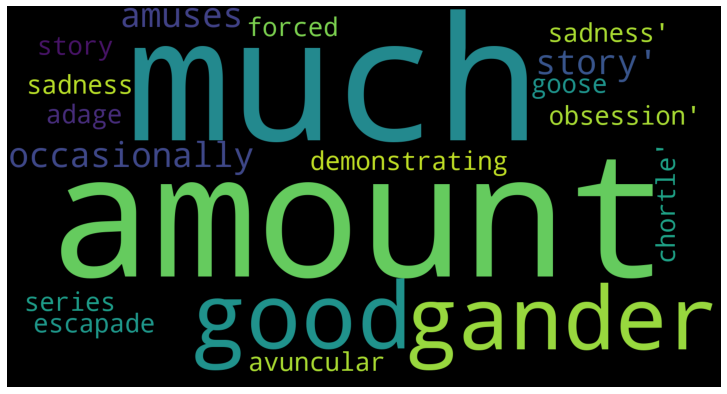

In [29]:
for_graph=train1[train1["Sentiment_class"]=="negative"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(max_words=500, width=1500, height=800).generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

### Display the Words which Represent Neutral Sentiment

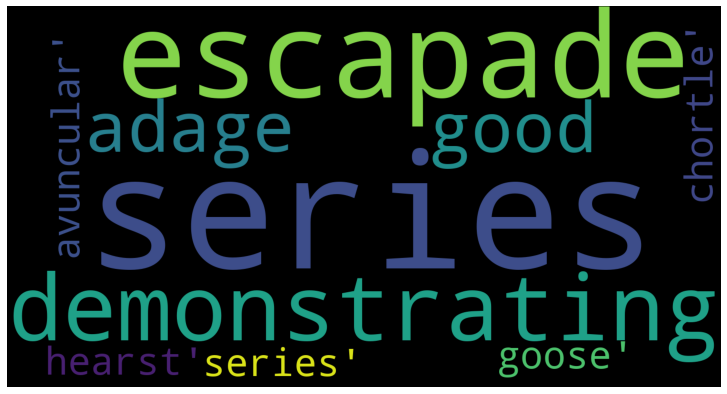

In [30]:
for_graph=train1[train1["Sentiment_class"]=="neutral"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(max_words=500, width=1500, height=800).generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

#### Change Background of graph

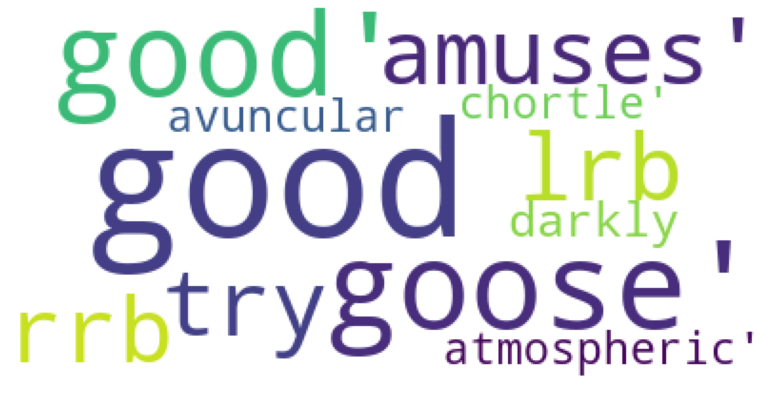

In [32]:
for_graph=train1[train1["Sentiment_class"]=="positive"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(collocations=False, background_color='white').generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

### Model Development

In [36]:
train1['Sentiment_class'].map({'positive':2, 'negative':1, 'neutral':0})
train1.head()

,Phrase,Sentiment_class,Phrase1
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative,series escapade demonstrating adage good goose good gander occasionally amuses amount much story
1,A series of escapades demonstrating the adage that what is good for the goose,neutral,series escapade demonstrating adage good goose
2,A series,neutral,series
3,A,neutral,
4,series,neutral,series


#### Creating x, y variables

In [38]:
x=train1['Phrase1']
y=train1['Sentiment_class']

#### Spliting data

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer: It Convert the text data into numerical data

In [40]:
x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=0.3, random_state=0)

#### Convert the text data into numerical data using countvectorizer

In [44]:
cvt=CountVectorizer(lowercase=True, stop_words='english', max_df=0.5,min_df=80)
cvt

CountVectorizer(max_df=0.5, min_df=80, stop_words='english')

#### Fitting countverctorizer

In [45]:
cvt_fitted=cvt.fit(x_train)

In [46]:
len(cvt_fitted.get_feature_names())

897

#### Create DataFrame of Words Generated by countvectorizer

In [47]:
x_train_df=pd.DataFrame(cvt_fitted.transform(x_train).toarray(),columns=cvt_fitted.get_feature_names())

In [48]:
x_train_df.head()

,ability,able,act,acted,acting,action,actor,actress,actually,adam,...,worthwhile,worthy,writer,writing,written,wrong,year,york,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x_train_df.shape

(109242, 897)

In [50]:
cvt_fitted.vocabulary_

{'frame': 288,
 'half': 335,
 'hour': 364,
 'movie': 500,
 'work': 881,
 'filmmaker': 273,
 'inventive': 401,
 'bad': 43,
 'plot': 563,
 'near': 509,
 'classic': 115,
 'drama': 192,
 'wind': 871,
 'hope': 361,
 'dream': 194,
 'minute': 488,
 'trying': 813,
 'figure': 270,
 'kid': 411,
 'left': 426,
 'college': 121,
 'study': 743,
 'nearly': 510,
 'flat': 279,
 'effort': 207,
 'attempt': 37,
 'look': 441,
 'american': 21,
 'eye': 243,
 'end': 212,
 'make': 455,
 'point': 565,
 'energy': 215,
 'woman': 877,
 'dull': 197,
 'silly': 686,
 'loud': 446,
 'pointless': 566,
 'going': 317,
 'fast': 257,
 'clear': 116,
 'simply': 688,
 'wanted': 853,
 'genre': 308,
 'indian': 383,
 'sophisticated': 709,
 'spectacle': 717,
 'moving': 501,
 'watchable': 859,
 'performance': 547,
 'actor': 6,
 'boring': 71,
 'pay': 543,
 'dvd': 199,
 'instead': 390,
 'effective': 206,
 'atmosphere': 36,
 'use': 832,
 'little': 437,
 'like': 433,
 'looking': 442,
 'oscar': 531,
 'role': 633,
 'good': 319,
 'debut': 

In [51]:
x_val_df=pd.DataFrame(cvt_fitted.transform(x_val).toarray(),columns=cvt_fitted.get_feature_names())
x_val_df.head()

,ability,able,act,acted,acting,action,actor,actress,actually,adam,...,worthwhile,worthy,writer,writing,written,wrong,year,york,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(x_train_df,y_train)
print("Train Score : ", dt.score(x_train_df, y_train))
print("Val Score : ", dt.score(x_val_df, y_val))

Train Score :  0.5520587319895278
Val Score :  0.5498099021743774


**Score is low use Random Forest Classifier**

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_df,y_train)
print("Train Score : ", rf.score(x_train_df, y_train))
print("Val Score : ", rf.score(x_val_df, y_val))